<div align="center">
  <h1> Práctica 1. Búsqueda heurística. </h1>
  <img src="https://i.imgur.com/3LPS9YG.png" />
  <h4> Alumno: Elvi Mihai Sabau Sabau <h2>
  <h4> DNI: 51254875L<h2>
</div>

---
<div align="center">
<h1> Indice </h1>
</div>

- ## Algoritmo A*
  - ### Sobre el algoritmo A*.
  - ### Formula y Criterio.
- ## Preparando el código de la plantilla.
  - ### `Casilla.py`.
  - ### `Mapa.py`.
  - ### Archivo de Heuristicas: `heuristicas.py`.
  - ### `Node.py`.
  - ### `main.py`.
- ## Implementación del algoritmo A*.
  - ### Métodos Auxiliares.
    - #### `neighborSlots(Node)`.
    - #### `movementCost(n1, n2)`.
  - ### Implementación.
    - #### `AStar(map, start_slot, end_slot, path, heuristic)`.
    - #### Nodos de inicio y fin.
    - #### Lista interior y frontera (sets `discovered` y `checked`).
    - #### Bucle principal.
    - #### Revisión del mejor nodo (`current_best_node`).
    - #### Destino Encontrado! Reconstrucción del camino desde los padres.
    - #### Actualización del estado del nodo actual.
    - #### Bucle de los vecinos.
    - #### Comprobaciones.
    - #### Numero del nodo, `g`, `h` y `f`, y actualización del set.
    - #### Mejor camino?
    - #### Finalización.
    - #### Resumen del proceso.
- ## Ejecución y Demostración.
  - ### Mapas y sus caracteristicas.
  - ### Muestras por mapa.
- ## Heuristicas.
  - ### Lista de Heuristicas.
    - #### Uniforme.
    - #### Manhattan.
    - #### Euclidea.
    - #### Chebyshev.
  - ### Analisis entre Heuristicas.
    - #### Uniforme.
    - #### Manhattan.
    - #### Euclidea.
    - #### Chebyshev.
  - ### Tablas Comparativas.
- ## Traza de un problema.
- ## Conclusiones.

---

<img width="100%" src="https://i.imgur.com/Xozlnnz.png" />

<h3> Sobre el algoritmo A*</h3>

El algoritmo A* es un algoritmo tentativo multicamino, y dependiendo de la heuristica a usar puede ser informado o no informado, así variando su patrón de busqueda.

Este algoritmo mapea el mundo desde la casilla origen, avanzando y enlazando cada posición siguiente a la posición actual, creando varios caminos desde el origen, y explorandolos a la vez.

La prioridad de busqueda de cada casilla se basa en el coste `f(n)` de cada casilla, así analizando siempre antes las casillas más cercanas al origen.

Una vez que el algoritmo encuentra el destino en uno de sus caminos, este reconstrulle el camino usando los enlaces previos de cada casilla desde la casila destino hacia el origen, devolviendo el camino más corto entre los dos puntos.

Según la definición del Algoritmo A\* de Wikipedia es el siguiente: 

```MARKDOWN
El algoritmo de búsqueda A* se clasifica dentro de los algoritmos de búsqueda 
en grafos. Presentado por primera vez en 1968 por Peter E. Hart, Nils J.
Nilsson y Bertram Raphael, el algoritmo A* encuentra, siempre y cuando se 
cumplan unas determinadas condiciones, el camino de menor coste entre un nodo 
origen y uno objetivo.
```

<h3> Formula y Criterio </h3>

El algoritmo A\* utiliza una función de evaluación: `f*(n) = g*(n) + h*(n)` siendo:
- `g*(n) = c (s, n)`: Coste del camino de coste mínimo desde el nodo inicial s al nodo n. Estimada por `g(n)`.

- `h*(n)`: Coste del camino de coste mínimo de todos los caminos desde el nodo n a cualquier estado solución. Estimada por `h(n)`.

- `f\*(n)`: Coste del camino de coste mínimo desde el nodo inicial hasta un nodo solución condicionado a pasar por n. `f*(n) = g*(n) + h*(n)`. Estimada por `f(n)`.

- `C*`: Coste del camino de coste mínimo desde el nodo inicial a un nodo solución.

Como cualquier algoritmo de búsqueda en amplitud, A\* es un algoritmo completo.

Si hay una solución, siempre la encontrará. Para asegurar la optimización del algoritmo, la función `h(n)` debe ser heurísticamente admisible, es decir, no sobreestimará el costo real de alcanzar el nodo objetivo.

Una función heurística h (n) se considera aceptable cuando se satisface: `h(n) ≤ h* (n) ∀n` .

Cuanto más exactamente estimamos `h(n)`, menos nodos de búsqueda generaremos. 




---

<img width="100%" src="https://i.imgur.com/KVszeiq.png"/>
Antes de empezar a explicar la implementación del propio código, vamos a explicar ciertas partes que se han modificado o añadido para desarollar la práctica de manera más facil.

- ## `Casilla.py`

A la clase casilla se la han sobrecargado varios operadores para poder operar de manera más rapida sobre ellas, además de haber creado un metodo hash para poder identificar unicamente a cada casilla por sus coordenadas, este metodo se usa para revisar si un nodo ha sido revisado previamente, por ejemplo.

In [ ]:
...

# == operator overload
def __eq__(self, otro):
    if type(otro) is Casilla:
        return self.fila == otro.getFila() and self.col == otro.getCol()
    elif type(otro) is tuple:
        return self.fila == otro[0] and self.col == otro[1]
    else:
        raise ValueError(
            'Error on the Casilla == overload. Data type invalid:' + type(otro).__name__)

# + operator overload
def __add__(self, otro):
    if type(otro) is Casilla:
        c = Casilla(self.fila + otro.getFila(),
                    self.col + otro.getCol())
    else:
        raise ValueError(
            'Error on the Casilla + overload. Data type invalid:' + type(otro).__name__)
    return c

# - operator overload
def __sub__(self, otro):
    if type(otro) is Casilla:
        c = Casilla(self.fila - otro.getFila(),
                    self.col - otro.getCol())
    else:
        raise ValueError(
            'Error on the Casilla - overload. Data type invalid:' + type(otro).__name__)
    return c

# string operator overload
def __str__(self):
    return '(' + str(self.fila) + ', ' + str(self.col) + ')'

# We created a unique hash for said slot
def __hash__(self):
    return hash(self.getTupla())

# Returns slot
def getTupla(self):
    """Returns a tuple version of the Slot class (Casilla)"""
    return (self.fila, self.col)
  
...

- ## `Mapa.py`

Se ha añadido a la clase mapa un nuevo método que se usará para verificar si una casilla está dentro de las dimensiones del mapa.

In [ ]:
...
def inBounds(self, fila, columna):
    if fila >= 0 and fila < self.alto and columna >= 0 and columna < self.ancho:
        return True

    return False
...

- ## Archivo de heuristicas `heuristicas.py`.

Se ha creado un archivo aparte que contiene metodos con formulas heuristicas (`heuristicas.py`), esta manera, solo hay que pasar por parametro al algoritmo A* la heuristica que se quiere usar, esto se hace desde el archivo `main.py`.

In [ ]:
# heuristicas.py
def uniforme(actual, destino):
    return 0


def manhattan(actual, destino):
    return abs(actual.getFila() - destino.getFila()) + abs(actual.getCol() - destino.getCol())
    

def euclidea(actual, destino):

    dx = abs(actual.getFila() - destino.getFila()) ** 2
    dy = abs(actual.getCol() - destino.getCol()) ** 2

    return (dx * dx + dy * dy) ** (1/2)

def chebyshev(actual, destino):
    dx = abs(actual.getFila() - destino.getFila())
    dy = abs(actual.getCol() - destino.getCol())

    return max(dx, dy)

Y despues, en el archivo `main.py`...

In [ ]:
...

# En la cabezera.
from heuristicas import uniforme
from heuristicas import euclidea
from heuristicas import chebyshev
from heuristicas import manhattan

...

# En el bucle del juego, al llamar al A*
coste = AStar(mapa, origen, destino, camino, manhattan)

...

- ## `Node.py`

Hemos creado aparte, una clase nodo, que usaremos para tratar cada casilla (`slot`), guardar el nodo desde el que proviene al explorar (`parent`), su numero de posición dentro de su camino (`number`), y sus valores `g`, `h` y `f`. 

Esta clase además, posee las sobrecargas de los operadores de igualdad y el de hash (hash generado usando las coordenadas de la casilla), que se usan para comprobar si dos instancias diferentes entre nodo hacen referencia a la misma casilla.

In [ ]:
# Elvi Mihai Sabau Sabau

class Node():
    """A Node class, used to encapsulate each slot (Casilla) and assign them the g, h and f value, and also its position in its search path"""
    def __init__(self, parent=None, slot=None):
        self.parent = parent
        self.slot = slot

        # Distance from start point
        self.g = 0

        # Distance prediction until end point
        self.h = 0

        # Total distance.
        self.f = 0

        # Node number, used to enumerate pahts.
        self.number = 0

    # Overload of operator ==
    def __eq__(self, otro):
        return self.slot == otro.slot

    # Hash method, we need this one so we can use sets.
    def __hash__(self):
        return self.slot.__hash__()


- ## `main.py`

Además de lo anteriormente mencionado en el apartado del archivo de heuristicas, el archivo `main.js` ha sido modificado para poder imprimir en azul las casillas exploradas, y por consola, una matriz de cada celda con los caminos y su orden respectivo a su camino al ser explorados.


In [ ]:
...

# En la cabezera.
AZUL = (0, 0, 255)

...

# En el bucle del juego.
# pinta mapa
for fil in range(mapa.getAlto()):
    filastring = ''
    
    for col in range(mapa.getAncho()):

        # Por cada tick, pinta el mapa, y imprime en consola los caminos
        if mapa.getCelda(fil, col) == 2 and not primeraVez:
            pygame.draw.rect(screen, BLANCO, [
                              (TAM+MARGEN)*col+MARGEN, (TAM+MARGEN)*fil+MARGEN, TAM, TAM], 0)
            filastring += '-1'.rjust(4)
        if mapa.getCelda(fil, col) == 0:
            if camino[fil][col] == '.':
                pygame.draw.rect(screen, BLANCO, [
                                  (TAM+MARGEN)*col+MARGEN, (TAM+MARGEN)*fil+MARGEN, TAM, TAM], 0)
                filastring += '-1'.rjust(4)
            elif camino[fil][col][0] == 1:
                pygame.draw.rect(screen, AZUL, [
                                  (TAM+MARGEN)*col+MARGEN, (TAM+MARGEN)*fil+MARGEN, TAM, TAM], 0)
                filastring += str(camino[fil][col][1]).rjust(4)
            elif camino[fil][col][0] == 0:
                pygame.draw.rect(screen, AMARILLO, [
                                  (TAM+MARGEN)*col+MARGEN, (TAM+MARGEN)*fil+MARGEN, TAM, TAM], 0)
                filastring += ('[' + str(camino[fil][col][1]) + ']').rjust(4)

        elif mapa.getCelda(fil, col) == 1:
            pygame.draw.rect(
                screen, ROJO, [(TAM+MARGEN)*col+MARGEN, (TAM+MARGEN)*fil+MARGEN, TAM, TAM], 0)
            filastring += '-1'.rjust(4)
        else:
            filastring += '-1'.rjust(4)


    print(filastring)

  print("--------------------------------------------------")

...

---

<img width="100%" src="https://i.imgur.com/11tjekH.png" />

El archivo `AStart.py` contiene el algoritmo A* implementado, con los metodos necesarios para su operacion.

Vamos a ir poco a poco, detallando cada parte de este archivo, explicando el algorimo y la funcionalidad del código en detalle.

<h3> Métodos Auxiliares <h3>

- `neighborSlots(node):`

La funcion `neighborSlots` devuelve un array con las casillas vecinas del nodo que recibe por parametro.


In [ ]:
def neighborSlots(Node):
    """Get neighboring slots of the Node"""
    casilla = Node.slot
    # ↑ = ( 0, 1 )
    # ↓ = ( 0, -1)
    # → = (-1, 0 )
    # ← = ( 1, 0 )
    # ↗ = ( 1, 1 )
    # ↘ = ( 1, -1)
    # ↖ = (-1, 1 )
    # ↙ = (-1, -1)
    return [casilla + Casilla(0, 1), casilla + Casilla(0, -1), casilla + Casilla(1, 0), casilla + Casilla(-1, 0),
            casilla + Casilla(1, 1), casilla + Casilla(1, -1), casilla + Casilla(-1, 1), casilla + Casilla(-1, -1)]


- `movementCost(n1, n2)`:

Este metodo devuelve el coste del movimiento de un nodo `n1` al otro nodo `n2`. El coste varia dependiendo de si vecinos diagonales o no.
Ambos nodos `n1` y `n2` deben ser vecinos para que funcione.

In [ ]:
def movementCost(n1, n2):
    """Get the movement cost from n1 to n2 (both must be neighbors)"""
    diagonal_movements = set({Casilla(1, 1), Casilla(1, -1),
                              Casilla(-1, -1), Casilla(-1, 1)})

    if ((n1.slot - n2.slot) in diagonal_movements):
        return 1.5

    return 1

### Implementación.

  #### `AStar(map, start_slot, end_slot, path, heuristic)`.

  Esta es la definicion de nuestra funcion A*, recibe desde el main: el mapa, la casilla de inicio, la casilla destino, el array de casillas que representaria el camino-solucion, y la heuristica a usar.
 
  

In [ ]:
def AStar(map, start_slot, end_slot, path, heuristic):
    """A path-finding algorithm that maps all best paths from any end point to the start point."""


   
  #### Nodos de inicio y fin.
    
Las casillas de inicio y fin se convirten a nodos para poder manejarlos de manera mas facil en nuestro programa.




In [ ]:
    # Create the start and end nodes.
    start_node = Node(None, start_slot)
    end_node = Node(None, end_slot)

  #### Sets interior y frontera (sets `discovered` y `checked`).

Creamos unos sets que representan la lista frontera (yo lo llamo `discovered` por el hecho de que alberga nodos descubiertos) y la lista interior (llamado `checked` por el hecho de que albergará los nodos comprobados), en mi A* usamos sets por el hecho de que un set en python se comporta como un HashTable, y el acceso a un elemento de un set es mucho mas rapido ( O(1) ). Y estoy acostumbrado a usarlos por dicha eficiencia.

Añadimos el nodo origen al set de discovered, y empezamos la iteracion del bucle principal.



In [ ]:
    # We also create our discovered (open set) and checked (closed set).
    # Nodes that are discovered when looking for neighbor slots.
    discovered = set()
    # Nodes that are checked and aren't the end node.
    checked = set()

    # Add our start node to our discovered set.
    discovered.add(start_node)


  #### Bucle principal.

Mientras que nuestro set de nodos descubiertos no este vacio, sacamos de dicho set el nodo con menor f siendo este el nodo más prometedor actual (el mejor de esta iteración) `current_best_node`, usando una función lambda aplicada a la función `min()`.



In [ ]:
    # Time to explore and map the paths, while there are still discovered nodes to check, we shall continue.
    while discovered:

        # We grab the node with lowest F from all discovered nodes.
        current_best_node = min(discovered, key=lambda o: o.f)

  #### Destino Encontrado! Reconstruccion del camino desde los padres.
  
Comprobamos que nuestro mejor nodo prometedor actual es el destino, si lo es, recontruimos el camino desde el destino, usando la referencia que tiene cada nodo a su padre ( nodo desde el que se exploro el nodo actual ), y mientras que el padre del nodo sobre el que se itera no sea `None`, guardamos los nodos en una lista, siendo los valores de la clave las coordenadas de la casilla de cada nodo, y su valor una tupla en la cual, el primer numero representa si es un nodo explorado (1) o si hace parte del camino de la solución (0), y el segundo valor siendo el numero de casilla desde el origen al destino ( estos datos se usan mas tarde para dibujar las casillas de cierto color, y para imprimir por consola el mapa con el orden de las casillas exploradas por cada camino, y no tiene nada que ver con el algoritmo estrella, es solo para nuestro programa y la manera en la cual se muestran los datos ).

De esta manera, tendremos una lista con todos los nodos desde el origen al destino, siendo este el mas optimo calculado usando la heuristica ejecutada, y devolvemos el coste total `f`.


  


In [ ]:
        # If that that node is the end node...
        if current_best_node == end_node:

            # Save f for later.
            f = current_best_node.f

            # Reconstruct the path.
            while current_best_node:
                current_slot = current_best_node.slot

                # We assigna a value to the path slot, so we can draw colors over it later on, and also represent its order number.
                path[current_slot.getFila()][current_slot.getCol()] = (
                    0, current_best_node.number)

                # If theres no more nodes to reconstruct, we are finished! :D
                if not current_best_node.parent:
                    return f
                else:
                    current_best_node = current_best_node.parent

  #### Actualización del estado del nodo actual.

Si al comprobar, el nodo actual no es el destino, lo sacamos de nuestro set de descubiertos, y lo guardamos en nuestro set de comprobados, y revisamos sus vecinos.
  


In [ ]:
        # We checked the node with lowest F, sadly that wasnt the end node, so we move it to the checked set.
        discovered.remove(current_best_node)
        checked.add(current_best_node)

  #### Bucle de los vecinos.
  
En un bucle, vamos a ir iterando por cada casilla vecina del nodo actual.
  


In [ ]:
        # We check the neighboring nodes. For each neighbor coordinate..
        for neighbor_slot in neighborSlots(current_best_node):

  #### Comprobaciones.
  
Comprobaremos que:
- El nodo vecino no es una pared.
- Que tampoco sus coordenadas apunten a una casilla que este fuera del mapa.
- Ademas comprobamos si este nodo vecino ya se ha revisado con anterioridad ( si esta en el set de comprobados ), esta comprobacion se hace usando las coordenadas de la casilla implicitamente al tener las coordenadas de las casillas hasheadas.

Si se da cualquiera de estos casos, se salta la iteracion actual y pasa al siguiente vecino.
  


In [ ]:
            # Check if the current neighbor coordinate is actually in bounds of the map.
            if not map.inBounds(neighbor_slot.getFila(), neighbor_slot.getCol()):
                continue

            # We make sure that the neighbor coordinate is not a wall
            if map.getCelda(neighbor_slot.getFila(), neighbor_slot.getCol()) != 0:
                continue

            # Create a new node with the neighbor coordinates, and also attach the parent node (current best node) to it.
            neighbor_node = Node(current_best_node, neighbor_slot)

            # Check if the current neighbor node wasn't checked on previous iterations.
            if neighbor_node in checked:
                continue

  #### Numero del nodo, `g`, `h` y `f`, y actualización del set.
  
Una vez que haya pasado las comprobaciones, y comprobamos que el nodo vecino no este en el set de descubiertos...

- Le asignamos el nodo actual como `parent` del nodo vecino.

- Calculamos su `g` sumando la `g` actumulada del nodo prometedor actual con el coste del movimiento de este al vecino, este variando de si el nodo vecino esta en diagonal o no.

- Su `h` dependiendo de la heuristica usada.

- Y `f`, sumando `g` y `h`.

- Ademas de actualizar su `number` siendo este la enumeracion del nodo en ese camino.

Una vez hecho esto, guardamos el nodo vecino en el set de explorados, para que en la siguiente iteracion sea canditado a nodo actual `current_best_node`, y pasamos al siguiente vecino.
  


In [ ]:
            if neighbor_node not in discovered:

                neighbor_node.g = current_best_node.g + movementCost(current_best_node, neighbor_node)
                neighbor_node.h = heuristic(neighbor_node.slot, end_node.slot)
                neighbor_node.f = neighbor_node.g + neighbor_node.h
                neighbor_node.number = current_best_node.number + 1

                discovered.add(neighbor_node)
                continue

  #### Mejor camino?

En caso de que nuestro nodo vecino ya este en el set de descubiertos, y el coste del movimiento del nodo actual al vecino, sea menor que el coste que tiene actualmente el vecino, actualizamos el padre del nodo vecino, y sus valores.

Ya que esto significaria que hemos encontrado un camino ( de casilla a casilla ) mas optimo para ese vecino desde nuestro nodo prometedor actual.



In [ ]:
            # If we have already discovered the neighboring Node and the current best node has better values than the neighboring node's parent ...
            for node_discovered in discovered:
                if node_discovered == neighbor_node and node_discovered.g > current_best_node.g + movementCost(node_discovered, current_best_node):

                    # We update g and the parent of the neighboring node! (A better path has been found to reach the neighboring Node.)
                    node_discovered.g = current_best_node.g + \
                        movementCost(node_discovered, current_best_node)

                    node_discovered.parent = current_best_node
                    node_discovered.number = current_best_node.number + 1

                break

  #### Finalización.

  Este procedimiento se repite hasta que el nodo prometedor actual sea el destino, o que el set de nodos descubiertos esté vacio, en caso de que esto ultimo pasara, significaria que nuestro algoritmo ha explorado y revisado el mapa entero, y no ha encontrado el destino porque no existe, o no es accesible.

  
  #### Resumen del proceso.

El algoritmo A* es un algoritmo que nos asegura que encontrara un camino de un punto A, a un punto cualquiera de nuestro dominio.

</br>

Dependiendo de la heurística que usemos para calcular el coste, esta puede ser mas pesada o mas ligera, o que la solución sea la mas optima o menos optima.


</br>


En general, el algoritmo A* lo que hace es revisar los nodos vecinos del nodo mas prometedor.

</br>


En cada iteración, se revisa el nodo mas prometedor hasta el momento ( nodo con menor F ), de una lista de nodos donde guardamos los nodos explorados hasta el momento, pero sin revisar.

</br>


La revisión consiste simplemente en comprobar si dicho nodo es el destino, y si no lo es, se revisa sus vecinos, y el nodo prometedor actual se cambia de lista, de la lista de nodos explorados sin revisar, a una lista donde guardamos los nodos revisados.

</br>


Hecho esto, comprobamos los nodos vecinos del nodo prometedor actual, comprobamos que no sean paredes, que sea un nodo que esta dentro del mapa, y además que no se haya revisado con anterioridad ( revisar que no haya ya un nodo en la lista de revisados con las mismas coordenadas ). Al hacer esto, nos aseguramos de que podemos pasar por ese nodo, y de que no se ha revisado con anterioridad.

</br>


Entonces, si el nodo vecino no esta en la lista de nodos explorados SIN revisar, por cada nodo vecino valido, calculamos su h dependiendo de la heurística, y calculamos su g sumándole el g acumulado del nodo prometedor actual + el coste del movimiento (dependiendo de la posición del nodo vecino, el coste al transitar del nodo prometedor actual al nodo vecino puede variar).

</br>


Además, muy importante, nos guardamos una referencia como "nodo padre" del nodo prometedor actual, en el nodo vecino, de esta manera, sabremos de donde hemos venido si encontramos el destino.

</br>


Una vez calculados los valores del nodo vecino, nos guardamos el nodo en la lista de nodos explorados sin revisar. De esta manera lo hacemos candidatos a nodo prometedor.

</br>


En caso de que el nodo vecino este en la lista de nodos explorados SIN revisar, comprobamos si movernos desde el nodo prometedor actual al vecino es mas facil que el camino que se tomo originalmente para pasar por el nodo vecino originalmente. La comprobación se hace comprobando si la g acumulada del nodo vecino es mayor que la g acumulada del nodo actual prometedor + el coste de moverse del nodo actual prometedor al nodo vecino.

</br>


Si lo es, recalculamos g para dicho vecino, y re-asignamos el nodo actual prometedor como la referencia de "nodo padre" para el nodo vecino.

</br>


Este proceso se repite en bucle mientras que hayan nodos dentro de la lista de nodos explorados sin revisar.

</br>


Si se da el caso de que el bucle acaba porque ya no quedan nodos para revisar en la lista de nodos explorados sin revisar, significaría que habremos explorado todo el dominio, y no hemos encontrado el destino.

</br>


Si se da el caso de que el nodo prometedor actual es el nodo destino, se reconstruye en una lista "camino" por ejemplo con un bucle, el camino recorrido usando las referencias de los padres consecutivamente añadiendo los nodos a la lista, hasta que el nodo a iterar no tiene ninguna referencia al nodo padre, esto significaría que hemos llegado a iterar sobre el nodo origen.

</br>


Actualmente, tendríamos una lista de nodos desde el destino al origen, asi que si queremos el camino del origen al destino, solo tenemos que darle la vuelta a nuestra lista "camino".


</br>



De esta manera, al estar priorizando el procesamiento del nodo mas prometedor en cada momento, se obtiene el camino mas corto entre 2 puntos.

</br>


Si se usa una heurística uniforme, se obtendrá la solución mas optima, pero a su vez, computacionalmente costosa.

</br>


El uso de otras heurísticas podrían ser mucho mas livianas, pero se podría dar el caso en el que no encuentre la solución mas optima debido a la sobreinformación de la heurística y características del estilo, dependiendo de como esta implementada dicha heurística. Una heurística puede ser optima y dominante sobre el resto para un problema, pero no significa que so sea para el resto de problemas del dominio.

<hr>

<img width="100%" src="https://i.imgur.com/200evdy.png" />

### Mapas y sus caracteristicas.
Los mapas del juego están ubicados en la carpeta `worlds`.

En esta practica, se han proporcionado 3 mapas `mapa.txt`, `mapa2.txt` y `mapa3.txt`, estos mapas no son nada más que documentos de texto que nuestro juego parsea a celdas de diferentes tipos en el mapa.

Hay 3 tipos de caracteres, cada uno parseado a un elemento diferente:
- `#` Se parsea a una pared (celdas rojas).
- `.` Se parsea a una celda transitable (celdas blancas).
- `O` Se parsea al certido, nuestro personaje (celda origen).

La celda destino la especificamos pinchando cualquier celda transitable.

Estos mapas cubren la mayor parte de situaciónes que se pueden dar para nuestro problema, pero personalmente pensé son un poco escasos, por ello hice unos mapas aparte para realizar pruebas más intesivas, y provocando situaciónes más compejas de solucionar para el algoritmo.

- `mapa4.txt` basado en el mapa `mapa.txt`, con zonas sin paredes, y situaciones especificas.
- `mapaFinal.txt` que es el que usaremos en las comparaciones de heuristicas.
- `stress.txt` que se ha usado para comprobaciones exhaustivas.
- `1.txt` que se ha usado para comprobaciones superextraexhaustivas (no se recomienda abrir ya que es demasiado grande)
- `mapablanco.txt` para revisar ciertas heuristicas.

### Muestras por mapa.

A continuación se muestran varias capturas de la ejecución de nuestro algoritmo A* en cada uno de los mapas mencionados anteriormente.

La heuristica usada para estas ejecuciones es la `uniforme`.

<div align="center">
  <h3>Mapa 1</h3>
  <img width="36%" src="https://i.imgur.com/mG1w8Jv.png" />
</div>

<div align="center">
  <h3>Mapa 2</h3>
  <img width="30%" src="https://i.imgur.com/NgbYxq4.png" />
</div>

<div align="center">
  <h3>Mapa 3</h3>
  <img width="30%" src="https://i.imgur.com/ZBDxMsM.png" />
</div>

<div align="center">
  <h3>Mapa Blanco</h3>
  <img width="40%"  src="https://i.imgur.com/h1gnmVg.png" />
</div>

<div align="center">
  <h3>Mapa 4</h3>
  <img width="42%"  src="https://i.imgur.com/bVo1K6Q.png" />
</div>

<div align="center">
  <h3>Stress</h3>
  <img width="100%"  src="https://i.imgur.com/5yvPV0j.png" />
</div>

<div align="center">
  <h3>Mapa Final</h3>
  <img width="100%"  src="https://i.imgur.com/bJaFP0x.png" />
</div>

<hr>

<img width="100%" src="https://i.imgur.com/ZABMmaN.png" />

Como se ha mencionado anteriormente, nuestro programa posee 4 heursiticas de las cuales elegir, las cuales afectaran el comportamiendo de nuestro algoritmo a la hora de buscar el destino y el camino más corto a el.

Estas heuristicas, dependiendo de la cantidad de información que aporten al algoritmo, podrían hacer el computo mucho mas liviano, pero se podría dar el caso en el que no encuentre la solución mas optima debido a la sobreinformación de la heurística.

Sependiendo de como esta implementada dicha heurística, una heurística puede ser optima y dominante sobre el resto para una situación en concreto, pero no significa que so sea para el resto de situaciónes que pueden pasar en el problema.

En nuestro caso, las diferente situaciones son los diferentes caminos que podemos crear al pinchar en diferentes celdas destino, ya que no es lo mismo calcular como ir de A a B que ir de X a Y.

### Lista de Heuristicas.

#### Desinformadas.
  - #### Uniforme.
    La heuristica uniforme es sencillo, se le asigna a `h` el valor de 0 siempre, haciendo que la busqueda sea desinformada, y uniforme.
      <div align="center">
    <img width="50%" src="https://i.imgur.com/gvvsw8u.png" />
  </div>




In [ ]:
def uniforme(actual, destino):
    return 0


#### Informadas.
  - #### Manhattan.
      La heuristica de la distancia manhattan es una heuristica que trae su nombre de los taxistas de Manhattan, ya que estos, al hacer transiciones diagonales, tenian que hacer zig-zags en cada calle.
      
  <div align="center">
    <img  src="https://i.imgur.com/2ebVwxF.png" />
  </div>



In [ ]:
def manhattan(actual, destino):
    return abs(actual.getFila() - destino.getFila()) + abs(actual.getCol() - destino.getCol())

  - Euclidea.
    La heuristica euclideana permite la busqueda en trazados rectos, y como en nuestro caso, se permite el movimiento diagonal, la podemos implementar.

      <div align="center">
        <img src="https://i.imgur.com/XrzaiSu.png" />
      </div>



In [ ]:
def euclidea(actual, destino):

    dx = abs(actual.getFila() - destino.getFila())
    dy = abs(actual.getCol() - destino.getCol())

    return (dx * dx + dy * dy) ** (1/2)

  - #### Chebyshev.
    También se conoce como distancia del tablero de ajedrez, ya que en el juego de ajedrez el número mínimo de movimientos que necesita un rey para ir de una casilla a otra en un tablero de ajedrez es igual a la distancia de Chebyshev entre los centros de las casillas.
<div align="center">
      <img src="https://i.imgur.com/BkTld1s.png" />
    </div>

In [ ]:
def chebyshev(actual, destino):
    dx = abs(actual.getFila() - destino.getFila())
    dy = abs(actual.getCol() - destino.getCol())

    return max(dx, dy)

### Comparativa y analisis entre Heuristicas.

Para todas las heuristicas, se realizará la prueba de 3 caminos en el mapa `mapaFinal.txt`.

Realizamos las ejecuciones por cada heuristica.


<div align="center" >

#### Uniforme.
</div>

La heuristica uniforme, da el camino más optimo como podemos ver en las tablas, pero es el que más nodos explora. Esta heuristica al ser la que siempre va a dar el camino más corto, se considera una heuristica admisible.

- 1er Tramo:
<img src="https://i.imgur.com/trKRs16.jpg" />

- 2ndo Tramo:
<img src="https://i.imgur.com/6e134w5.jpg" />

- 3er Tramo:
<img src="https://i.imgur.com/ZkmhbZS.jpg" />

<div align="center" >

#### Manhattan.
</div>

La heuristica manhattan explora menos nodos, pero su solución no siemprpe será la más optima, debido a que la heuristica esta sobreinformada para ciertos movimientos, siendo esta inadmisible. Ademas, podemos observar que se comporta de manera erronea en 8con, seguramente porque esta diseñada para 4con y no tiene en cuenta los tramos diagonales.

- 1er Tramo:
<img src="https://i.imgur.com/fjltroL.png" width="100%" />

- 2ndo Tramo:
<img src="https://i.imgur.com/0ijJz5d.png" width="100%" />

- 3er Tramo:
<img src="https://i.imgur.com/sQkPuTN.png" width="100%" />



<div align="center" >

#### Euclidea.
</div>

Con la heuristica Euclidea vemos que realiza casi la misma traza que el manhattan, siendo este inadmisible, pero explora menos nodos que manhattan.


- 1er Tramo:
<img src="https://i.imgur.com/yYUkwN2.png" width="100%" />

- 2ndo Tramo:
<img src="https://i.imgur.com/fOKtvPh.png" width="100%" />

- 3er Tramo:
<img src="https://i.imgur.com/cwgNzFf.png" width="100%" />

<div align="center" >

#### Chebyshev.

</div>

El algoritmo de chebyshev tampoco es admisible, pero el caso del 2ndo Tramo se ha dado la situación en la cual nos ha devuelto el camino más corto, explorando menos casillas que el algoritmo uniforme.

- 1er Tramo:
<img src="https://i.imgur.com/FvPyP8M.png" width="100%" />

- 2ndo Tramo:
<img src="https://i.imgur.com/Huy0ENF.png" width="100%" />

- 3er Tramo:
<img src="https://i.imgur.com/BvD0JXi.png" width="100%" />

<hr>

## Tablas comparativas.

A continuacion se compara los nodos revisados, coste, tiempo, y la longitud del camino.

1er Tramo:

| Heuristica | Nodos revisados | Coste | Tiempo (ms) |
|:----------:|:---------------:|:-----:|:-----------:|
| Uniforme   |       533       |  41,5 |    5.059    |
| Manhattan  |       247       |  43,5 |    4.736    |
| Euclidea   |       58        |  43,5 |    3.761    |
| Chebyshev  |       324       |  43,5 |    4.932    |



2ndo Tramo:

| Heuristica | Nodos revisados | Coste | Tiempo (ms) |
|:----------:|:---------------:|:-----:|:-----------:|
| Uniforme   |       688       |  77,5 |    4.116    |
| Manhattan  |       525       |  79,5 |    1.490    |
| Euclidea   |       127       |  78,5 |    3.971    |
| Chebyshev  |       585       |  77,5 |    3.621    |

3er Tramo:

| Heuristica | Nodos revisados | Coste | Tiempo (ms) |
|:----------:|:---------------:|:-----:|:-----------:|
| Uniforme   |       593       |  65,5 |    4.020    |
| Manhattan  |       370       |  69.5 |    2.626    |
| Euclidea   |       161       |  69.5 |    3.720    |
| Chebyshev  |       405       |  70.0 |    2.477    |

</div>

<hr>

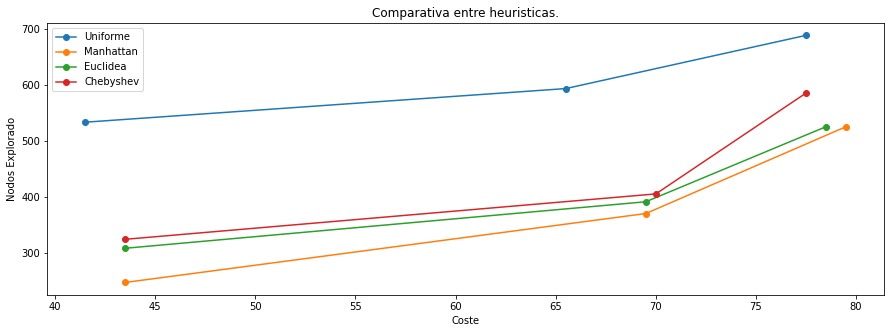

In [7]:
import numpy as np
from matplotlib import pyplot as plt

plt.figure(figsize=(15, 5))

# Uniforme
y = [533,  593, 688]
x = [41.5, 65.5, 77.5]

plt.plot(x, y, '-', label="Uniforme", marker='o')

# Manhattan
y = [247,  370, 525]
x = [43.5, 69.5, 79.5]

plt.plot(x, y, '-', label="Manhattan", marker='o')

# Euclidea
y = [308, 391, 525]
x = [43.5, 69.5, 78.5]

plt.plot(x, y, '-', label="Euclidea", marker='o')

# Chebyshev
y = [324, 405, 585]
x = [43.5, 70, 77.5]

plt.plot(x, y, '-', label="Chebyshev", marker='o')


plt.title("Comparativa entre heuristicas.")
plt.xlabel("Coste")
plt.ylabel("Nodos Explorado")

plt.legend()


plt.show()

## Traza de un problema.

En este apartado realizaremos la traza de un problema corto, con h = 0.

<br>


### pre-inicio.
Se declara la lista frontera y interna.
Se crea un nodo para el destino y para el origen.
Se guarda el nodo origen en la lista frontera.

Y, mientras que la lista frontera no esté vacia, se realiza un bucle.

<br>


### Por cada iteración.
Se obtiene el nodo con menor F de la lista frontera, lo llamaremos ( nodo actual prometedor ) porque es el nodo con el que se trabajará en esta iteración.
Se comprueba si ese nodo es el destino.
Si lo es, se reconstrulle el camino y devuelve el coste, y si no lo es, continua.

Por cada casilla vecina del nodo actual:
- Se comprueba que no sea una pared.
- Se comprueba que esté dentro del mapa.
- Se comprueba que no haya un nodo con dicha casilla en la lista interna.

Si alguno de los casos anteriores se da, continua con el siguiente vecino.

En caso contrario, crea un nodo con dicha casilla, y calcula sus h, g, y f.

- Se comprueba que no haya un nodo con dicha casilla en la lista frontera. Si lo está, comprueba si la g del nodo actual es menor que el de la lista frontera, y si lo es, se reemplaza.

<br>


### Fin.

El programa finaliza cuando se encuentra el destino, o cuando la lista frontera está vacia, esto ultimo significa que no se ha encontrado el destino.

<br>


A continuacion se muestra un ejemplo de la traza.

<hr>

Las casilla rosa representa el origen, y el verde el destino.

Las casillas amariillas representan casillas revisadas, y las casillas azules representan las casillas vecinas sin revisar.º

<img src="https://i.imgur.com/cqPIqyr.png" />



## Conclusiones.

El algoritmo A* nos devolverá siempre el camino más corto si existe, pero el coste computacional se dispara mientras más lejos esté el destino, ya que cada vez va a calcular más y más nodos.

<br>

Para recir este coste computacional, el algoritmo se puede volver informado cuando aplicamos una heuristica que aporte información sobre el destino, de tal manera que ayude a la busqueda del camino más corto, añadiendo otro factor de ponderación.

<br>

Aún así, dependiendo de la heuristica, no todas serán admisibles, ya que aunque en la mayoria de casos nos devuelva el camino más corto, hay cierta posibilidad de que no sea así.

<br>

Un buen ejemplo de esto seria la aplicación de Google Maps, en la grán mayoria de los casos, nos devolverá el camino más corto, pero en ciertos casos nos recomendará un camino que no seria el directo, y en algunos otros nos recomendará caminos que den pequeñas vueltas sin sentido antes de llegar al destino.

<br>

Esto se debe a la sobreinformación que aporta al heuristica al algoritmo, aún así, la mayoria de veces, una heuristica no adminisble seguirá siendo más provechosa que usar una heuristica admisible pero costosa computacionalmente hablando.